# SVM CLASSIFIER

Load the data.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


file = 'c:/users/Anana/Desktop/Ana/sensores/data/SSST/work_main_complete.csv'

# load dataset
dataframe = pd.read_csv(file)

In [14]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
seed = 7

dataframe = dataframe[['label','HRbias','BRbias','HRbiasV','BRbiasV','deltaHRbias','deltaBRbias', 'neu',  'hap']]

#randomize the order of the samples
dataframe = dataframe.dropna().reset_index(drop=True)
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[1:,1:].astype(float)
Y = dataset[1:,0]

#encode the labels
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

target_names = ['calm', 'stress']

#build the training set
nTrain=int(0.7*len(X))
X_train = X[:nTrain,:]
y_train = encoded_Y[:nTrain]

#test set
X_test = X[nTrain:,:]
y_test = encoded_Y[nTrain:]


X_std_train = np.nan_to_num(X_train)
X_std_test = np.nan_to_num(X_test)

#standarize both tests separatedly
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_std_train)
X_train = StandardScaler().fit_transform(rescaledX_train)
rescaledX_test = scaler.fit_transform(X_std_test)
X_test = StandardScaler().fit_transform(rescaledX_test)

### Functions for evaluating the model

**performance(y_test, y_prediction)**: calculates different parameters

**plot_confusion_matrix**: plots the confusion matrix

**report_result**: prints a report of the results

In [15]:
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def performance(y_test, y_predicted):
    
    #Calassification accuracy
    class_acc = accuracy_score(y_test, y_predicted)

    #Accuracy by classes
    report = classification_report(y_test, y_predicted, target_names=target_names)
    
    cnf_matrix = confusion_matrix(y_test, y_predicted)

    
    return class_acc, report, cnf_matrix


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    
def report_result(y_test, predicted):    
    class_acc, report, cnf_matrix = performance(y_test, predicted)

    #print np.bincount(y_test == predicted)
    #print y_test == predicted
    print ('Classification Accuracy: ' + str(class_acc))
    print ('Report \n' + report)
    
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix, without normalization')

    plt.subplot(222)
    plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

#### Linear kernel

Classification Accuracy: 0.616589861751
Report 
             precision    recall  f1-score   support

       calm       0.55      0.73      0.63       964
     stress       0.71      0.53      0.60      1206

avg / total       0.64      0.62      0.61      2170

Confusion matrix, without normalization
[[702 262]
 [570 636]]
Normalized confusion matrix
[[ 0.72821577  0.27178423]
 [ 0.47263682  0.52736318]]


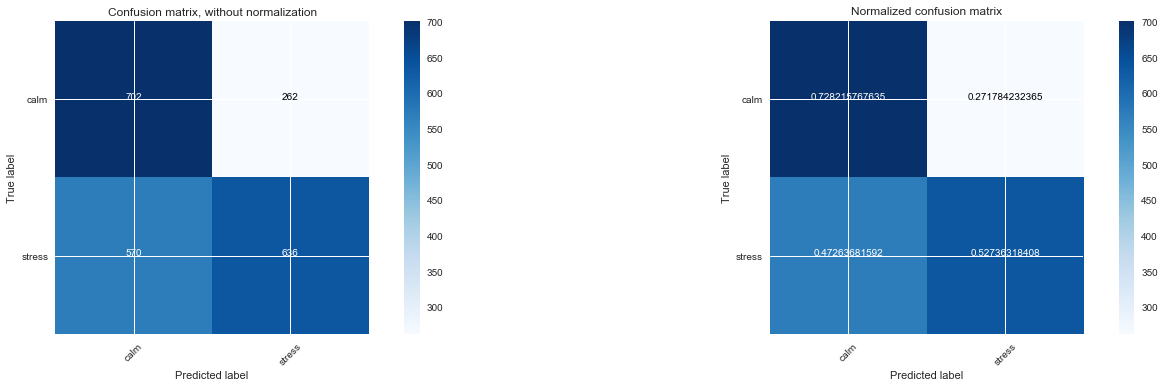

In [16]:
from sklearn import svm
from sklearn.model_selection import cross_val_score


#Small C: cost of misclassification high. Large C: cost of misclassification small. The results do not change with C.

model_lin = svm.SVC(kernel='linear', C=1, gamma=100) 
model_lin.fit(X_train, y_train)
model_lin.score(X_test, y_test)
#Predict Output
predicted_lin_train= model_lin.predict(X_train)
predicted_lin_test= model_lin.predict(X_test)

report_result(y_train, predicted_lin_train)

false_positive_ratelin, true_positive_ratelin, thresholdslin = roc_curve(y_test,predicted_lin_test)
roc_auclin = auc(false_positive_ratelin, true_positive_ratelin)

#### RBF Kernel

Classification Accuracy: 0.843010752688
Report 
             precision    recall  f1-score   support

       calm       0.83      0.80      0.81       396
     stress       0.86      0.87      0.86       534

avg / total       0.84      0.84      0.84       930

Confusion matrix, without normalization
[[317  79]
 [ 67 467]]
Normalized confusion matrix
[[ 0.80050505  0.19949495]
 [ 0.12546816  0.87453184]]


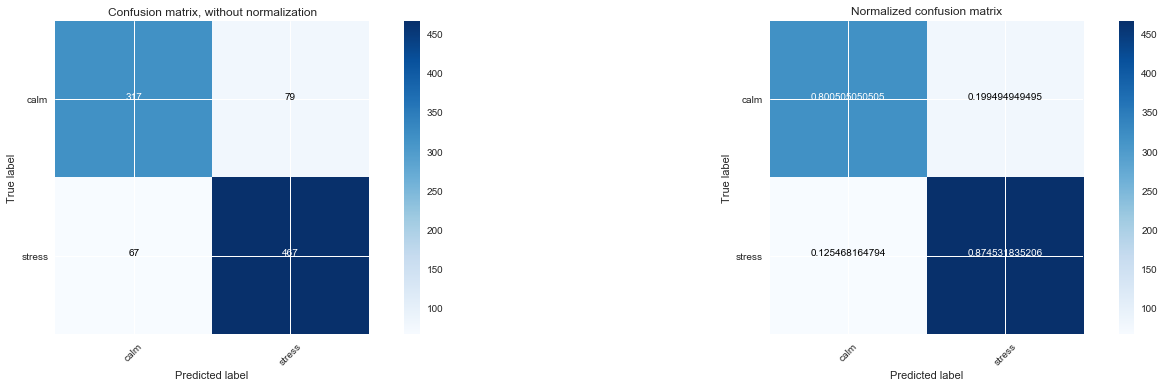

In [17]:
# Create SVM classification object 
model_rbf = svm.SVC(kernel='rbf', C=10, gamma=1) 

#Best score with C=10, gamma=1

model_rbf.fit(X_train, y_train)
model_rbf.score(X_test, y_test)
#Predict Output
predicted_rbf= model_rbf.predict(X_test)
predicted_rbf_train= model_rbf.predict(X_train)

report_result(y_test, predicted_rbf)

false_positive_raterbf, true_positive_raterbf, thresholdsrbf = roc_curve(y_test,predicted_rbf)
roc_aucrbf = auc(false_positive_raterbf, true_positive_raterbf)

####  Polinomial kernel

Classification Accuracy: 0.710752688172
Report 
             precision    recall  f1-score   support

       calm       0.63      0.78      0.70       396
     stress       0.80      0.66      0.72       534

avg / total       0.73      0.71      0.71       930

Confusion matrix, without normalization
[[308  88]
 [181 353]]
Normalized confusion matrix
[[ 0.77777778  0.22222222]
 [ 0.33895131  0.66104869]]


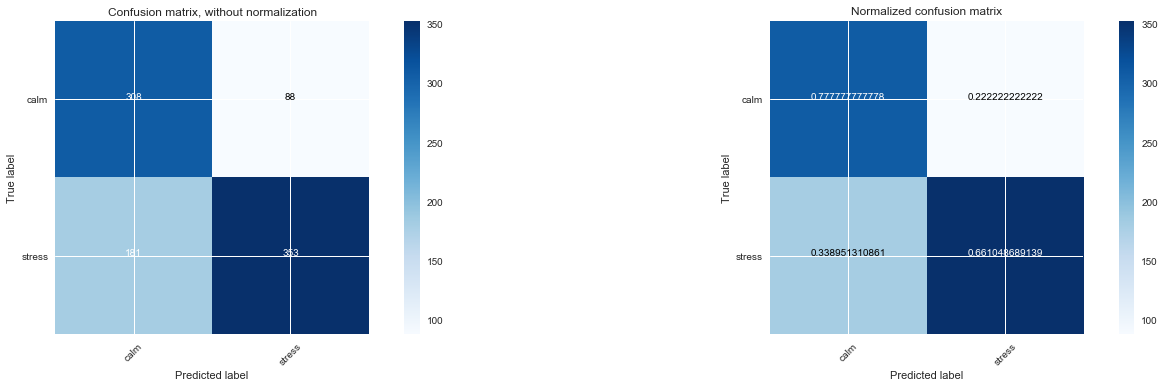

In [18]:
model_poly = svm.SVC(kernel='poly',degree = 3, C=1, gamma=1) 
model_poly.fit(X_train, y_train)
model_poly.score(X_test, y_test)
#Predict Output
predicted_poly= model_poly.predict(X_test)
predicted_poly_train= model_poly.predict(X_train)

report_result(y_test, predicted_poly)

false_positive_ratepoly, true_positive_ratepoly, thresholdspoly = roc_curve(y_test,predicted_poly)
roc_aucpoly = auc(false_positive_ratepoly, true_positive_ratepoly)

Classification Accuracy: 0.561290322581
Report 
             precision    recall  f1-score   support

       calm       0.49      0.51      0.50       396
     stress       0.62      0.60      0.61       534

avg / total       0.56      0.56      0.56       930

Confusion matrix, without normalization
[[203 193]
 [215 319]]
Normalized confusion matrix
[[ 0.51262626  0.48737374]
 [ 0.40262172  0.59737828]]


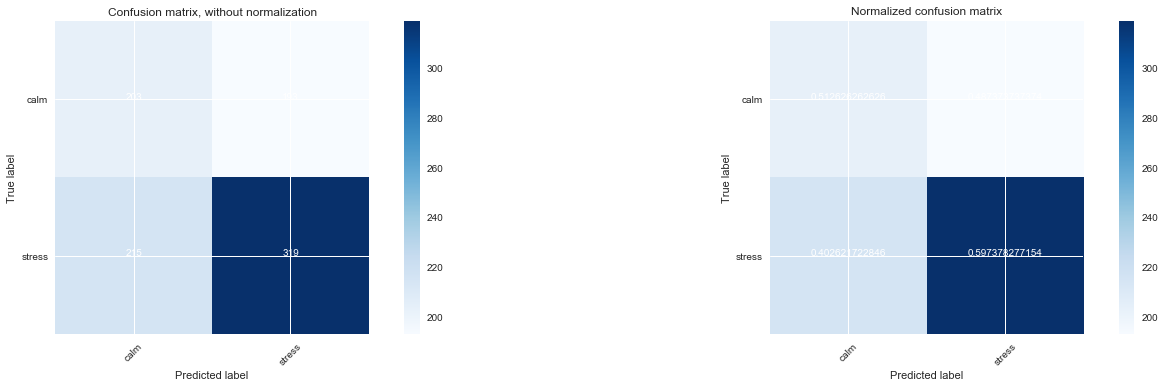

In [32]:
model_sigmoid = svm.SVC(kernel='sigmoid', C=10, gamma=1) 
model_sigmoid.fit(X_train, y_train)
model_sigmoid.score(X_test, y_test)
#Predict Output
predicted_sigmoid= model_sigmoid.predict(X_test)
predicted_sigmoid_train= model_sigmoid.predict(X_train)

report_result(y_test, predicted_sigmoid)

false_positive_rate_sigmoid, true_positive_rate_sigmoid, thresholds_sigmoid = roc_curve(y_test,predicted_sigmoid)
roc_auc_sigmoid = auc(false_positive_rate_sigmoid, true_positive_rate_sigmoid)

C:\Users\anana\Anaconda3\envs\py35new\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


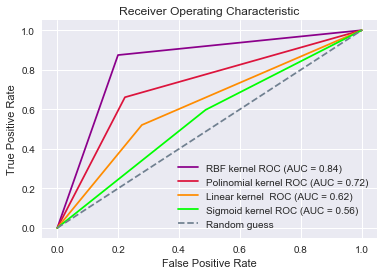

In [35]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.title('Receiver Operating Characteristic')


plt.plot(false_positive_raterbf, true_positive_raterbf, 'darkmagenta',
label='RBF kernel ROC (AUC = %0.2f)' % roc_aucrbf)

plt.plot(false_positive_ratepoly, true_positive_ratepoly, 'crimson',
label='Polinomial kernel ROC (AUC = %0.2f)' % roc_aucpoly)

plt.plot(false_positive_ratelin, true_positive_ratelin, 'darkorange',
label='Linear kernel  ROC (AUC = %0.2f)' % roc_auclin)


plt.plot(false_positive_rate_sigmoid, true_positive_rate_sigmoid, 'lime',
label='Sigmoid kernel ROC (AUC = %0.2f)' % roc_auc_sigmoid)

plt.plot([0,1],[0,1],color='slategray',linestyle='--', label = 'Random guess')
plt.legend(loc='lower right')
plt.show()



K-fold evaluation of the RBF Kernel

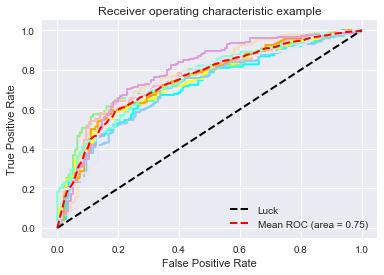

In [38]:
from itertools import cycle
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

Y = encoded_Y
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(C=10.0,kernel='rbf', probability=True,
                     random_state=random_state)
random_state = np.random.RandomState(0)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'lightgreen', 'wheat', 'yellow', 'lightpink', 'orange','lightskyblue','aquamarine','plum','lavender'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, Y), colors):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color)

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, Y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='r', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

m = pd.DataFrame()
m['mean_fpr']=mean_fpr
m['mean_tpr']=mean_tpr
#The mean is saved to compare woth the deep learning model
m.to_csv('C:/Users/anana/Desktop/Ana/sensores/results/resultadosStandford/VERDAD/SVM/m.csv')